In [2]:
# Matrices de Pauli

I=[ 1.0 0.0; 0.0 1.0]
X=[0.0 1.0; 1.0 0.0]
Y=[0.0 -1.0im; 1.0im 0.0]
Z=[1.0 0.0; 0.0 -1.0]

2×2 Matrix{Float64}:
 1.0   0.0
 0.0  -1.0

In [2]:
U1=kron([I, Z]...)

4×4 Matrix{Float64}:
 1.0   0.0  0.0   0.0
 0.0  -1.0  0.0  -0.0
 0.0   0.0  1.0   0.0
 0.0  -0.0  0.0  -1.0

In [3]:
sigmas=Dict(1=>X, 2=>Y, 3=>Z, 0=>I)

Dict{Int64, Matrix} with 4 entries:
  0 => [1.0 0.0; 0.0 1.0]
  2 => ComplexF64[0.0+0.0im -0.0-1.0im; 0.0+1.0im 0.0+0.0im]
  3 => [1.0 0.0; 0.0 -1.0]
  1 => [0.0 1.0; 1.0 0.0]

In [4]:
sigmas[1]

2×2 Matrix{Float64}:
 0.0  1.0
 1.0  0.0

In [4]:
function sigma(indice, pos, n)
    mat=sigmas[indice]
    list=[]
    for i in 1:n
        if i==pos
            push!(list, mat)
        else
            push!(list, sigmas[0])
        end
    end
    return kron(list ...)
end

sigma (generic function with 1 method)

In [101]:
sigma(3, 1, 2)*sigma(3, 2, 2)

4×4 Matrix{Float64}:
 1.0   0.0   0.0  0.0
 0.0  -1.0   0.0  0.0
 0.0   0.0  -1.0  0.0
 0.0   0.0   0.0  1.0

In [100]:
sigma(3, 2, 2)

4×4 Matrix{Float64}:
 1.0   0.0  0.0   0.0
 0.0  -1.0  0.0  -0.0
 0.0   0.0  1.0   0.0
 0.0  -0.0  0.0  -1.0

In [49]:
epsilon=0.5
n=4
J= 2epsilon*rand.(n) + (1-epsilon)*ones(n)

4-element Vector{Float64}:
 0.7289759561669268
 1.3537384510773065
 0.6537985993945731
 0.9242809189162016

In [6]:
using LinearAlgebra

In [7]:
function Ising(n, b,J, epsilon; cerrada=false)
    if cerrada==false
        m=n-1
       
    elseif cerrada==true
        m=n
        
    end
   

    H=-sum([J[mod(i,n+1)]*sigma(3, mod(i, n+1), n)*sigma(3,mod(i+1, n+1), n) for i in 1:m]) + b*sum([sigma(1, i, n) for i in 1:n])

    
    return H
    
end


Ising (generic function with 1 method)

In [104]:
for i in 1:n
    println(mod(i,n+1), mod(i+1, n+1))
end

12
23
34
40


In [8]:

function coordenadas(n, J, epsilon)
    lista=[]
    for b in 0:0.01:1
        H=Ising(n, b, J, epsilon)
        append!(lista, map(x-> [b, x], eigvals(H)))
    end
    return lista
end


coordenadas (generic function with 1 method)

In [9]:
x_coords=[l[1] for l in coordenadas(n, J, epsilon)]
y_coords=[l[2] for l in coordenadas(n, J, epsilon)]

404-element Vector{Float64}:
 -1.0306879277050638
 -1.0306879277050638
  1.0306879277050638
  1.0306879277050638
 -1.0308819545985652
 -1.0306879277050638
  1.0306879277050638
  1.030881954598565
 -1.0314638162906922
 -1.0306879277050636
  ⋮
  2.214479081932579
 -2.232200171202609
 -1.0306879277050638
  1.0306879277050638
  2.232200171202609
 -2.2499594672609025
 -1.030687927705064
  1.0306879277050638
  2.2499594672609002

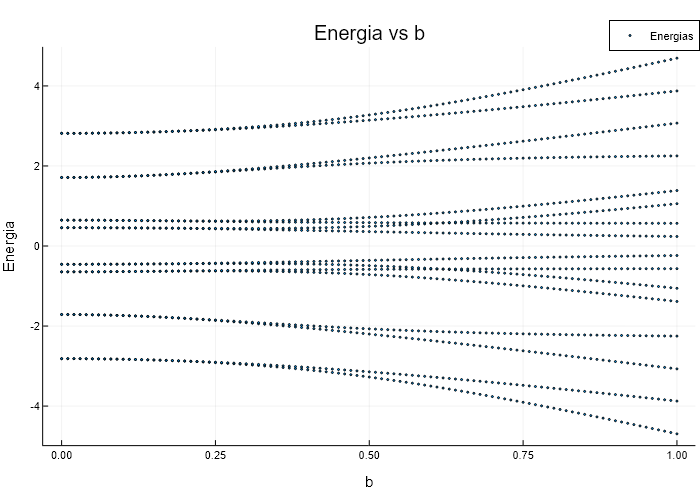

In [118]:
using Plots
plotlyjs()
scatter(x_coords , y_coords, label="Energias", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1)

#display(scatter(x_coords, y_coords, xlims=(0.5, 1), ylims=(-1,1), markersize=1))

In [10]:
function sigmas_pauli(pos, n)
    mat=sigmas[pos]
    list=[]
    for i in 1:n
    
        push!(list, mat)
    end
    return kron(list ...)
end

sigmas_pauli (generic function with 1 method)

In [50]:
sigmas_x=sigmas_pauli(1, n)

16×16 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

In [51]:

vals= eigvals(sigmas_x)
vecs=eigvecs(sigmas_x)

16×16 Matrix{Float64}:
  0.0        0.0        0.0        0.0       …  0.0       0.0       0.707107
  0.707107   0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.707107  0.0       0.0
  0.0        0.707107   0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.707107   0.0       …  0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0.707107     0.0       0.707107  0.0
  0.0        0.0        0.0       -0.707107     0.0       0.707107  0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0        0.0       -0.707107   0.0       …  0.0       0.0       0.0
  0.0        0.0        0.0        0.0          0.0       0.0       0.0
  0.0       -0.707107   0.0        0.0          0.0       0.0       0.0
  0.0        0.0        0.0        0

In [13]:
vals[1]

-1.0

In [14]:
findall(vals .== -1)

2-element Vector{Int64}:
 1
 2

In [15]:
P=vecs[:, findall(vals .== 1)]

4×2 Matrix{Float64}:
 0.0       0.707107
 0.707107  0.0
 0.707107  0.0
 0.0       0.707107

In [16]:
H=Ising(n, 2, J, epsilon)

4×4 Matrix{Float64}:
 -1.03069  2.0      2.0       0.0
  2.0      1.03069  0.0       2.0
  2.0      0.0      1.03069   2.0
  0.0      2.0      2.0      -1.03069

In [22]:
function Hamiltoniano_paridad(n, b, J, epsilon, vecs, parity)
    H=Ising(n, b, J, epsilon)
    P=vecs[:, findall(vals .== parity)]
    Hp=zeros(2^(n-1), 2^(n-1))
    for i in 1:2^(n-1)
        for j in 1:2^(n-1)
            Hp[i, j]=P[:, i]'*H*P[:, j]
        end
    end
    return Hp
end


Hamiltoniano_paridad (generic function with 3 methods)

In [23]:
Hp=Hamiltoniano_paridad(n, 2, J, epsilon, vecs, 1)

2×2 Matrix{Float64}:
 1.03069   4.0
 4.0      -1.03069

In [25]:
function coordenadas1(n, J, epsilon, vecs, parity)
    lista=[]
    for b in 0:0.01:1
        H=Hamiltoniano_paridad(n, b, J, epsilon, vecs, parity)
        append!(lista, map(x-> [b, x], eigvals(H)))
    end
    return lista
end


coordenadas1 (generic function with 1 method)

In [52]:
x_coords1=[l[1] for l in coordenadas1(n, J, epsilon, vecs, 1)]
y_coords1=[l[2] for l in coordenadas1(n, J, epsilon, vecs, 1)]

808-element Vector{Float64}:
 -2.736513006638807
 -1.4289158078496602
 -1.278561094304953
 -0.029036104484193363
  0.029036104484193363
  1.278561094304953
  1.4289158078496602
  2.736513006638807
 -2.736706997013913
 -1.4290034051772613
  ⋮
  4.654486936102863
 -4.687838193083829
 -1.8328291553994673
 -1.353003997521728
 -0.012487350893909325
  0.0124873508939095
  1.3530039975217294
  1.8328291553994636
  4.687838193083833

In [53]:
x_coords2=[l[1] for l in coordenadas1(n, J, epsilon, vecs, -1)]
y_coords2=[l[2] for l in coordenadas1(n, J, epsilon, vecs, -1)]

808-element Vector{Float64}:
 -2.736513006638807
 -1.4289158078496602
 -1.278561094304953
 -0.029036104484193363
  0.029036104484193363
  1.278561094304953
  1.4289158078496602
  2.736513006638807
 -2.7367069660221452
 -1.42900343616903
  ⋮
  3.9255162214865176
 -3.9430793484494657
 -2.577588000033828
 -2.097762842156092
 -0.7572461955282715
  0.7572461955282714
  2.0977628421560905
  2.577588000033828
  3.943079348449467

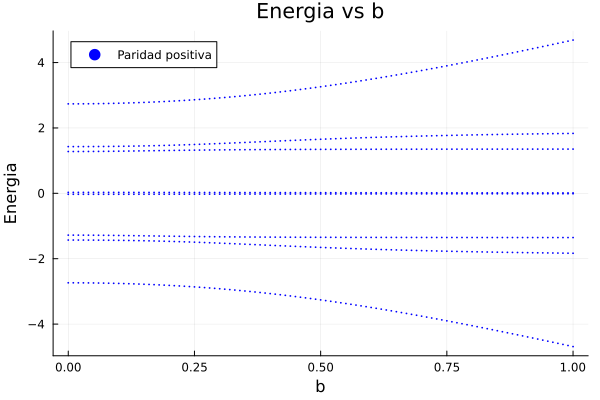

In [56]:
using Plots
scatter(x_coords1 , y_coords1, label="Paridad positiva", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1, markercolor=:blue, markerstrokewidth=0)


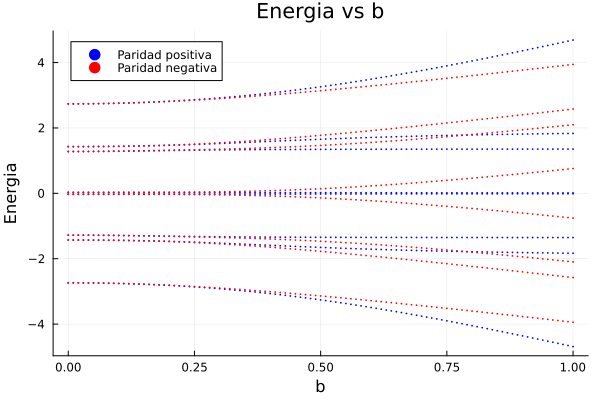

In [57]:
scatter!(x_coords2 , y_coords2, label="Paridad negativa", xlabel="b", ylabel="Energia", title="Energia vs b", markersize=1, markercolor=:red, markerstrokewidth=0)

In [58]:
A=[1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [59]:
[A[end]; A[1:end-1]]

3-element Vector{Int64}:
 3
 1
 2

In [60]:

function base_2(integer; pad= nothing)
    if pad == nothing
        return reverse(digits(integer, base = 2))
    else
        return reverse(digits(integer, base = 2, pad = pad))
    end
end

base_2 (generic function with 1 method)

In [61]:
function rotate(index, pad)
    vec=base_2(index, pad= pad)
    return [vec[end]; vec[1: end-1]]
end

rotate (generic function with 1 method)

In [75]:
rotate(2, 3)

3-element Vector{Int64}:
 0
 0
 1

In [80]:
function original_integer(list)
    return parse(Int, join(list); base=2) +1
end

original_integer (generic function with 1 method)

In [87]:
function K(pad)
    K= zeros(2^pad, 2^pad)
    for i in 1:2^pad
        K[ original_integer(rotate(i-1, pad)), i]=1
    end
    return K
end

K (generic function with 2 methods)

In [91]:
K(3)

8×8 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [84]:
H=Ising(5, 1, J, epsilon)


32×32 Matrix{Float64}:
 -3.77837   1.0      1.0        0.0        …   0.0      0.0       0.0
  1.0      -3.77837  0.0        1.0            0.0      0.0       0.0
  1.0       0.0      0.0141059  1.0            0.0      0.0       0.0
  0.0       1.0      1.0        0.0141059      0.0      0.0       0.0
  1.0       0.0      0.0        0.0            0.0      0.0       0.0
  0.0       1.0      0.0        0.0        …   0.0      0.0       0.0
  0.0       0.0      1.0        0.0            0.0      0.0       0.0
  0.0       0.0      0.0        1.0            0.0      0.0       0.0
  1.0       0.0      0.0        0.0            0.0      0.0       0.0
  0.0       1.0      0.0        0.0            0.0      0.0       0.0
  ⋮                                        ⋱            ⋮        
  0.0       0.0      0.0        0.0            0.0      0.0       1.0
  0.0       0.0      0.0        0.0            0.0      0.0       0.0
  0.0       0.0      0.0        0.0        …   1.0      0.0       0.0
 

In [ ]:
vales[:, 1]

16-element Vector{Float64}:
 -3.5616044339812785
 -2.7616044339812795
 -2.0197684179915623
 -1.4075385111274832
 -1.2197684179915642
 -0.9342975048622364
 -0.6075385111274825
 -0.13429750486223613
  0.1342975048622388
  0.6075385111274829
  0.9342975048622382
  1.2197684179915664
  1.4075385111274832
  2.019768417991566
  2.761604433981283
  3.561604433981284

In [38]:
pos_int=1
n=4
J=1
b=0



0

In [23]:
using LinearAlgebra

In [ ]:
ishermitian(Ising(pos_int, n, J, b))

true

In [25]:
size(Ising(pos_int, n, J, b))

(8, 8)

In [77]:
values, vecs= eigen(Ising( n, J, b, cerrada=true))

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
16-element Vector{Float64}:
 -4.0
 -4.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  4.0
  4.0
vectors:
16×16 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.

In [79]:
vecs[:,2]

16-element Vector{Float64}:
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
im*(Y*Z*X)

2×2 Matrix{ComplexF64}:
 -1.0+0.0im   0.0+0.0im
  0.0+0.0im  -1.0+0.0im

In [13]:
K0=Sym[1 0; 0 sqrt(1-p)]

UndefVarError: UndefVarError: `Sym` not defined in `Main`
Suggestion: check for spelling errors or missing imports.